<a href="https://colab.research.google.com/github/moonsung1234/LearningExample/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
fish = pd.read_csv("https://bit.ly/fish_csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [16]:
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]]
fish_target = fish["Species"]

In [17]:
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [14]:
fish_target.head()

0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object

In [19]:
sc = StandardScaler()
sc.fit(train_input)

train_scaled = sc.transform(train_input)
test_scaled = sc.transform(test_input)

로지스틱 희귀(Logistic Regression) 로 이진 분류 수행하기

In [23]:
bream_or_smelt = (train_target == "Bream") | (train_target == "Smelt")
train_bos_input = train_scaled[bream_or_smelt]
train_bos_target = train_target[bream_or_smelt]

In [40]:
pd.DataFrame(np.concatenate((np.array(train_bos_target).reshape(-1, 1), np.array(train_bos_input)), axis=1)).head()

,0,1,2,3,4,5
0,Bream,0.68295,0.487198,0.644618,1.15355,0.762781
1,Bream,0.260493,0.215827,0.422478,1.09724,0.296746
2,Smelt,-1.10996,-1.55778,-1.59456,-1.58991,-1.94206
3,Smelt,-1.11333,-1.57716,-1.60344,-1.66727,-1.86647
4,Bream,0.823769,0.438739,0.626847,1.25929,0.441192


In [42]:
model = LogisticRegression()
model.fit(train_bos_input, train_bos_target)

model.score(train_bos_input, train_bos_target)

1.0

In [47]:
print(model.predict(train_bos_input[:5])) # 예측값
print(model.predict_proba(train_bos_input[:5])) # 예측확률

['Bream' 'Bream' 'Smelt' 'Smelt' 'Bream']
[[0.99515149 0.00484851]
 [0.98786779 0.01213221]
 [0.0448157  0.9551843 ]
 [0.04329634 0.95670366]
 [0.99448578 0.00551422]]


로지스틱 희귀(Logistic Regression) 로 다중 분류 수행하기

In [58]:
model = LogisticRegression(C=1000, max_iter=1000)
model.fit(train_scaled, train_target)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
print(model.score(train_scaled, train_target))
print(model.score(test_scaled, test_target))

1.0
0.95


In [65]:
print(model.predict(train_scaled[:5]))
print(train_target[:5].to_numpy())

print(model.classes_)
print(np.round(model.predict_proba(train_scaled[:5]), decimals=3))

['Perch' 'Perch' 'Pike' 'Parkki' 'Perch']
['Perch' 'Perch' 'Pike' 'Parkki' 'Perch']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.    0.996 0.    0.001 0.    0.002]
 [0.    0.    0.999 0.    0.001 0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.998 0.    0.    0.    0.    0.002]
 [0.    0.    0.978 0.    0.021 0.    0.   ]]


# 부록
시그모이드(sigmoid function) 함수
<br/> 
소프트맥스(softmax function) 함수

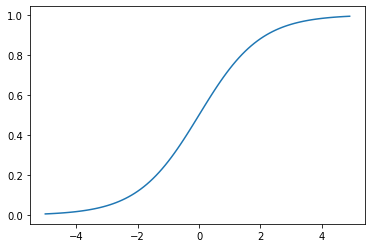

In [67]:
# softmax function

z = np.arange(-5, 5, 0.1)
sm = 1 / (1 + np.exp(-z))

plt.plot(z, sm)
plt.show()

In [80]:
# softmax function

z = np.arange(-5, 5, 0.1)
e_sum = np.sum(np.exp(z))
sm = np.exp(z) / e_sum

print(np.round(z, decimals=3))
print(np.round(sm, decimals=3))

[-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 -0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
  4.8  4.9]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.002 0.002
 0.002 0.002 0.002 0.003 0.003 0.003 0.004 0.004 0.004 0.005 0.005 0.006
 0.006 0.007 0.008 0.009 0.01  0.011 0.012 0.013 0.014 0.016 0